In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry as pc

In [334]:
COVID19Confirmed = pd.read_csv('time_series_19-covid-Confirmed.csv')
COVID19Recovered = pd.read_csv('time_series_19-covid-Recovered.csv')
COVID19Deaths = pd.read_csv('time_series_19-covid-Deaths.csv')

# Data Preparation and Cleansing

## Delete column Province/State

In [335]:
COVID19Confirmed =  COVID19Confirmed.drop(columns=['Lat', 'Long', 'Province/State'])
COVID19Recovered = COVID19Recovered.drop(columns=['Lat', 'Long', 'Province/State'])
COVID19Deaths =  COVID19Deaths.drop(columns=['Lat', 'Long', 'Province/State'])

## Delete NA row

In [336]:
COVID19Confirmed.dropna(how='all')
COVID19Recovered.dropna(how='all')
COVID19Deaths.dropna(how='all')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,Thailand,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Japan,0,0,0,0,0,0,0,0,0,...,16,19,22,22,27,29,29,29,33,35
2,Singapore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,Nepal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Canada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,Cape Verde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,East Timor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,Eritrea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Fix country name

In [339]:
COVID19Confirmed.loc[460,'Country/Region'] = "Bahamas"
COVID19Recovered.loc[460,'Country/Region'] = "Bahamas"
COVID19Deaths.loc[460,'Country/Region'] = "Bahamas"

COVID19Confirmed.loc[204,'Country/Region'] = "Côte d\'Ivoire"
COVID19Recovered.loc[204,'Country/Region'] = "Côte d\'Ivoire"
COVID19Deaths.loc[204,'Country/Region'] = "Côte d\'Ivoire"

## Covid19 Confirmed

- Group data by country

In [340]:
COVID19Confirmed = COVID19Confirmed.groupby('Country/Region').sum().reset_index()

In [342]:
COVID19Confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7,7,11,16,21,22,22,22,24,24
1,Albania,0,0,0,0,0,0,0,0,0,...,23,33,38,42,51,55,59,64,70,76
2,Algeria,0,0,0,0,0,0,0,0,0,...,24,26,37,48,54,60,74,87,90,139
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,39,39,53,75,88
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


# Add column ISO Alpha 3

In [343]:
def addIsoAlpha3(x):
    try:
        ISO_Alpha = pc.countries.get(name=x['Country/Region'].strip()).alpha_3
    except:
        ISO_Alpha = "-"
    
    return ISO_Alpha

In [344]:
COVID19Confirmed['ISO_Alpha'] = COVID19Confirmed.apply(lambda x : addIsoAlpha3(x), axis=1)
COVID19Confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,ISO_Alpha
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7,11,16,21,22,22,22,24,24,AFG
1,Albania,0,0,0,0,0,0,0,0,0,...,33,38,42,51,55,59,64,70,76,ALB
2,Algeria,0,0,0,0,0,0,0,0,0,...,26,37,48,54,60,74,87,90,139,DZA
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,2,39,39,53,75,88,AND
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,0,0,0,0,0,0,0,0,0,...,0,0,1,6,10,15,23,33,43,UZB
162,Venezuela,0,0,0,0,0,0,0,0,0,...,0,2,10,17,33,36,42,42,70,-
163,Vietnam,0,2,2,2,2,2,2,2,2,...,47,53,56,61,66,75,85,91,94,-
164,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,ZMB


In [345]:
COVID19Confirmed_unpivoted = COVID19Confirmed.melt(id_vars=['Country/Region'], var_name='date', value_name='total')
COVID19Confirmed_unpivoted.head()

,Country/Region,date,total
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


## Covid 19 Recovered

- Group data by country

In [346]:
COVID19Recovered = COVID19Recovered.groupby('Country/Region').sum().reset_index()

In [347]:
COVID19Recovered.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,Algeria,0,0,0,0,0,0,0,0,0,...,8,8,12,12,12,12,12,32,32,32
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
COVID19Recovered_unpivoted = COVID19Recovered.melt(id_vars=['Country/Region'], var_name='date', value_name='total')
COVID19Recovered_unpivoted.head()

,Country/Region,date,total
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


## Covid 19 Deaths 

- Group data by country

In [349]:
COVID19Deaths = COVID19Deaths.groupby('Country/Region').sum().reset_index()

In [350]:
COVID19Deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
2,Algeria,0,0,0,0,0,0,0,0,0,...,1,2,3,4,4,4,7,9,11,15
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
COVID19Deaths_unpivoted = COVID19Deaths.melt(id_vars=['Country/Region'], var_name='date', value_name='total')
COVID19Deaths_unpivoted.head()

,Country/Region,date,total
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


- Add status

In [352]:
COVID19Confirmed_unpivoted['Status'] = "Confirmed"
COVID19Recovered_unpivoted['Status'] = "Recovered"
COVID19Deaths_unpivoted['Status'] = "Deaths"

## Append all dataframe

In [353]:
COVID19DataFrame = COVID19Confirmed_unpivoted.append([COVID19Recovered_unpivoted, COVID19Deaths_unpivoted])

In [354]:
COVID19DataFrame

,Country/Region,date,total,Status
0,Afghanistan,1/22/20,0,Confirmed
1,Albania,1/22/20,0,Confirmed
2,Algeria,1/22/20,0,Confirmed
3,Andorra,1/22/20,0,Confirmed
4,Angola,1/22/20,0,Confirmed
...,...,...,...,...
9955,Uzbekistan,3/21/20,0,Deaths
9956,Venezuela,3/21/20,0,Deaths
9957,Vietnam,3/21/20,0,Deaths
9958,Zambia,3/21/20,0,Deaths


## Fill NaN value to 0

In [355]:
COVID19DataFrame.fillna(0)

,Country/Region,date,total,Status
0,Afghanistan,1/22/20,0,Confirmed
1,Albania,1/22/20,0,Confirmed
2,Algeria,1/22/20,0,Confirmed
3,Andorra,1/22/20,0,Confirmed
4,Angola,1/22/20,0,Confirmed
...,...,...,...,...
9955,Uzbekistan,3/21/20,0,Deaths
9956,Venezuela,3/21/20,0,Deaths
9957,Vietnam,3/21/20,0,Deaths
9958,Zambia,3/21/20,0,Deaths


# 5 Countries with the biggest confirmation cases

In [356]:
COVID19Confirmed_unpivoted[(COVID19Confirmed_unpivoted['Status'] == 'Confirmed') & (COVID19Confirmed_unpivoted['date'] == '3/21/20')].sort_values(by='total', ascending=False).head()

,Country/Region,date,total,Status
9827,China,3/21/20,81305,Confirmed
9873,Italy,3/21/20,53578,Confirmed
9949,US,3/21/20,25489,Confirmed
9936,Spain,3/21/20,25374,Confirmed
9856,Germany,3/21/20,22213,Confirmed


# Data Visualization

### Confirmed case in specific country

In [377]:
# Ganti nama negara sesuai dengan yang ingin anda cari
country = 'Indonesia'

In [372]:
dataChinaConfirmed = COVID19Confirmed_unpivoted[COVID19Confirmed_unpivoted['Country/Region'] == country]
dataChinaConfirmed = dataChinaConfirmed[dataChinaConfirmed.date != 'ISO_Alpha']
dataChinaConfirmed.head()

,Country/Region,date,total,Status
74,Indonesia,1/22/20,0,Confirmed
240,Indonesia,1/23/20,0,Confirmed
406,Indonesia,1/24/20,0,Confirmed
572,Indonesia,1/25/20,0,Confirmed
738,Indonesia,1/26/20,0,Confirmed


In [365]:
dataChinaRecovered = COVID19Recovered_unpivoted[COVID19Recovered_unpivoted['Country/Region'] == country]
dataChinaRecovered.head()

,Country/Region,date,total,Status
74,Indonesia,1/22/20,0,Recovered
240,Indonesia,1/23/20,0,Recovered
406,Indonesia,1/24/20,0,Recovered
572,Indonesia,1/25/20,0,Recovered
738,Indonesia,1/26/20,0,Recovered


In [363]:
dataChinaDeaths = COVID19Deaths_unpivoted[COVID19Deaths_unpivoted['Country/Region'] == country]
dataChinaDeaths.head()

,Country/Region,date,total,Status
74,Indonesia,1/22/20,0,Deaths
240,Indonesia,1/23/20,0,Deaths
406,Indonesia,1/24/20,0,Deaths
572,Indonesia,1/25/20,0,Deaths
738,Indonesia,1/26/20,0,Deaths


Text(0, 0.5, 'Total')

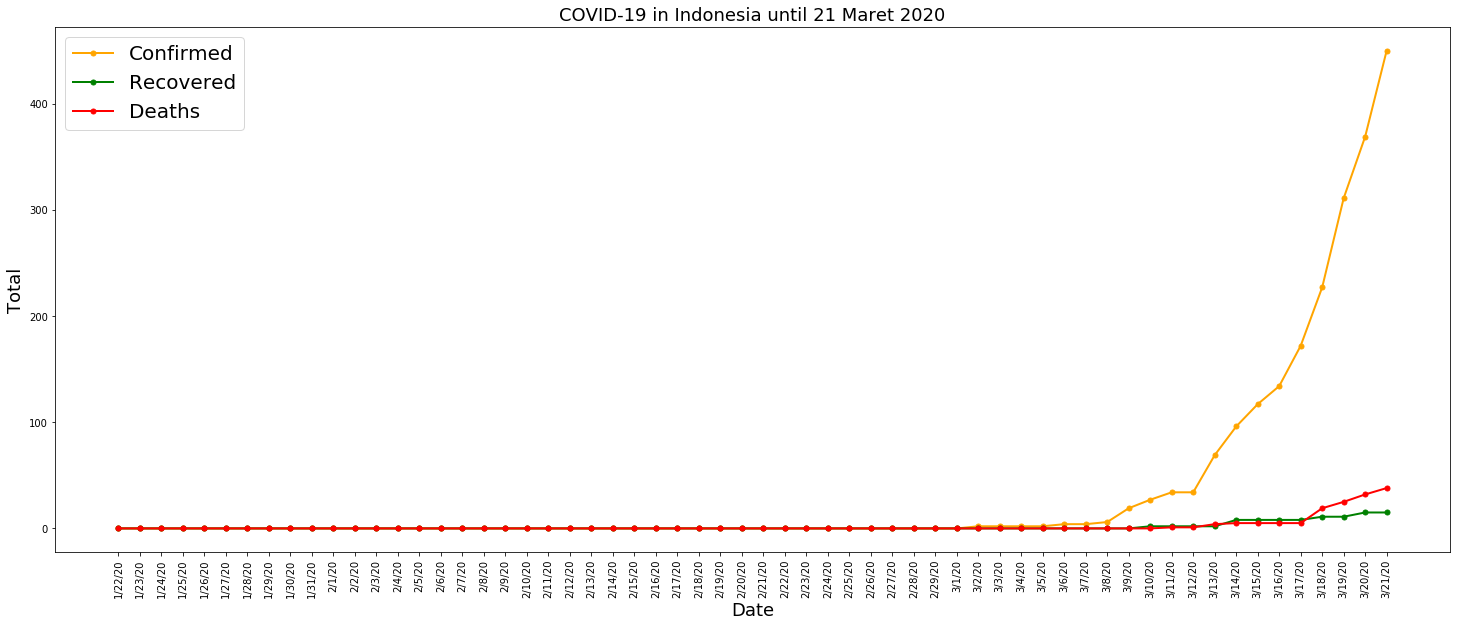

In [373]:
plt.figure(figsize=(25,10))
plt.xticks(rotation='vertical')
plt.plot('date', 'total', data=dataChinaConfirmed, label='Confirmed', marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=2)
plt.plot('date', 'total', data=dataChinaRecovered, label='Recovered', marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=2)
plt.plot('date', 'total', data=dataChinaDeaths, label='Deaths', marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.subplots_adjust(bottom=0.15)
plt.legend(loc=2, prop={'size': 20})
plt.title(f'COVID-19 in {country} until 21 Maret 2020', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)

In [376]:
fig = px.scatter_geo(COVID19Confirmed, locations="ISO_Alpha", hover_name="Country/Region", size="3/21/20", projection="natural earth"
                    )
fig.show()